In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Datasets given are for analysis of a US based company.<br>
Datasets given are for two cab companies.<br>
Dataset covers a timeframe from January 2016 to December 2018.<br>
XYZ is a private firm that wants to invest in one of the two companies. Provide analysis to help them decide the most profitable to invest in.

No missing values in four datasets.<br>
No duplicated values.

## Exploratory Data Analysis (EDA) of datasets

In [2]:
# Load details of transactions of the two companies
cab_data= pd.read_csv(r"C:\Users\kojoa\Desktop\Data Glacier\DataSets\Cab_Data.csv")
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [3]:
# Concise summary of dataframe
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
# Check for duplicates
cab_data.duplicated().value_counts()

False    359392
dtype: int64

In [5]:
#Transactions of cab companies
cab_data['Transaction ID'].nunique()

359392

Assumed transaction count and number of cabs are equal.

<AxesSubplot:title={'center':'Distribution of Distance Travelled by both companies'}, xlabel='KM Travelled', ylabel='Count'>

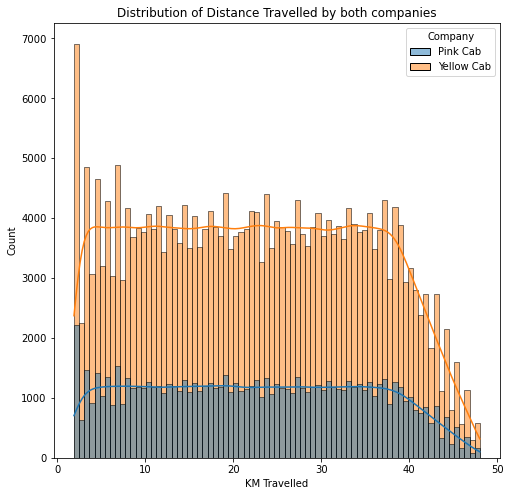

In [6]:
# Distance distribution of both companies 
plt.figure(figsize=(8,8))
plt.title('Distribution of Distance Travelled by both companies')
sns.histplot(data= cab_data, x= 'KM Travelled', hue= 'Company', kde= True)


<AxesSubplot:title={'center':'Distance Statistics of Each Company'}, xlabel='KM Travelled', ylabel='Company'>

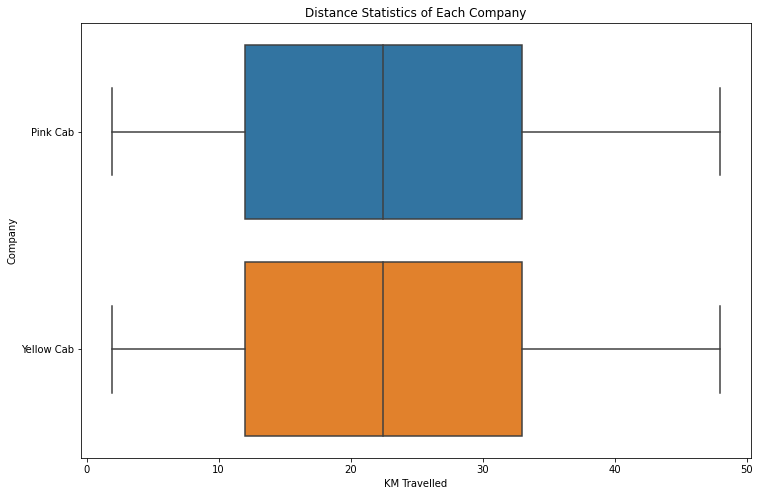

In [7]:
# Distance distribution for each company
plt.figure(figsize= (12, 8))
plt.title('Distance Statistics of Each Company')
sns.boxplot(data= cab_data, x= 'KM Travelled', y= 'Company', order= ['Pink Cab', 'Yellow Cab'])


<AxesSubplot:title={'center':'Charging Price Statistics for Each Company'}, xlabel='Price Charged', ylabel='Company'>

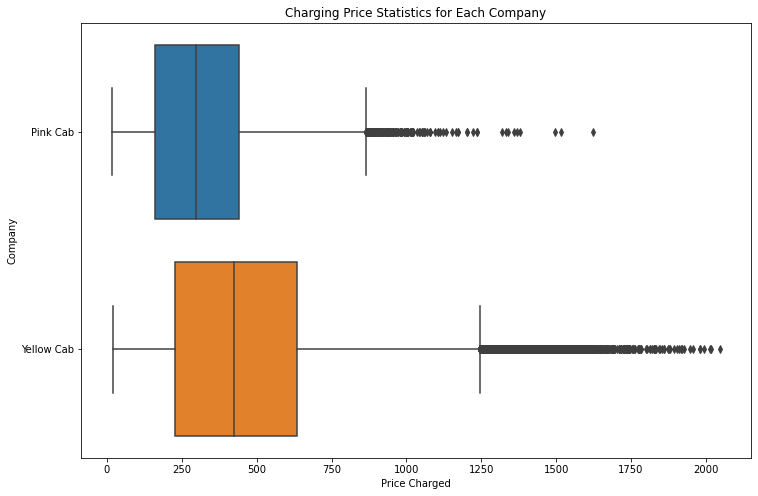

In [8]:
# Charging price distribution for each company
plt.figure(figsize= (12, 8))
plt.title('Charging Price Statistics for Each Company')
sns.boxplot(data= cab_data, x= 'Price Charged', y= 'Company', order= ['Pink Cab', 'Yellow Cab'])


<AxesSubplot:title={'center':'Count of Cabs in Each City'}, xlabel='count', ylabel='City'>

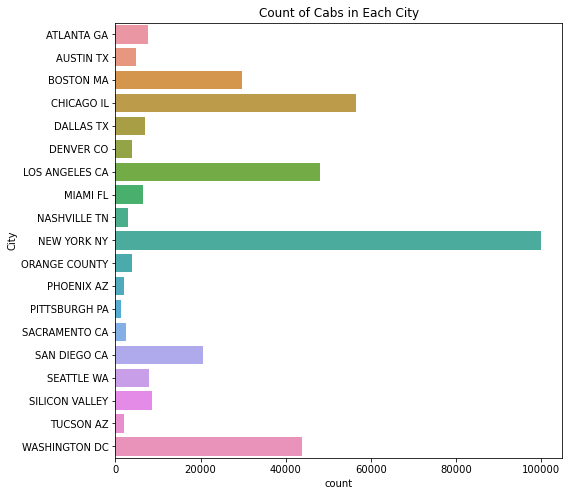

In [9]:
# Cabs in cities
plt.figure(figsize=(8,8))
plt.title('Count of Cabs in Each City')
sns.countplot(data= cab_data, y= 'City')

<AxesSubplot:title={'center':'Yellow Cab vs Pink Cab Proportion in Cities'}, xlabel='City'>

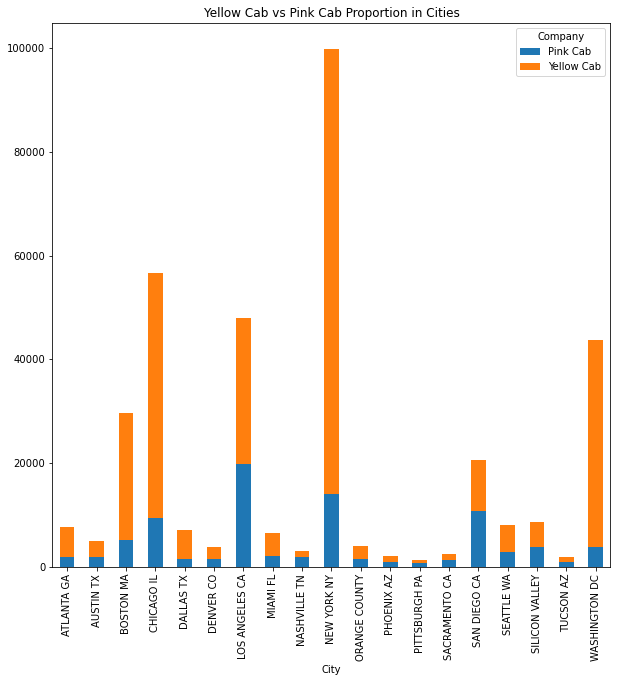

In [10]:
# Create cross table and plot stacked bar chart
stack= pd.crosstab(cab_data.City, cab_data.Company)
stack.plot(kind='bar', stacked=True, figsize=(10,10), title= 'Yellow Cab vs Pink Cab Proportion in Cities')


<AxesSubplot:title={'center':'Total Number of Yellow and Pink Cabs'}, xlabel='Company', ylabel='count'>

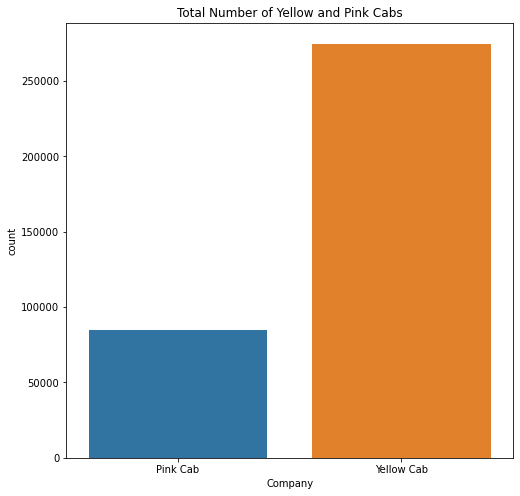

In [11]:
# Total cabs for each company 
plt.figure(figsize= (8,8))
plt.title('Total Number of Yellow and Pink Cabs')
sns.countplot(data= cab_data, x= 'Company', order= ['Pink Cab', 'Yellow Cab'])


In [12]:
# Feature engineer a profit column
cab_data['Profit']= cab_data['Price Charged']- cab_data['Cost of Trip']
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


<AxesSubplot:title={'center':'Profit of Each Company per City'}, xlabel='Profit', ylabel='City'>

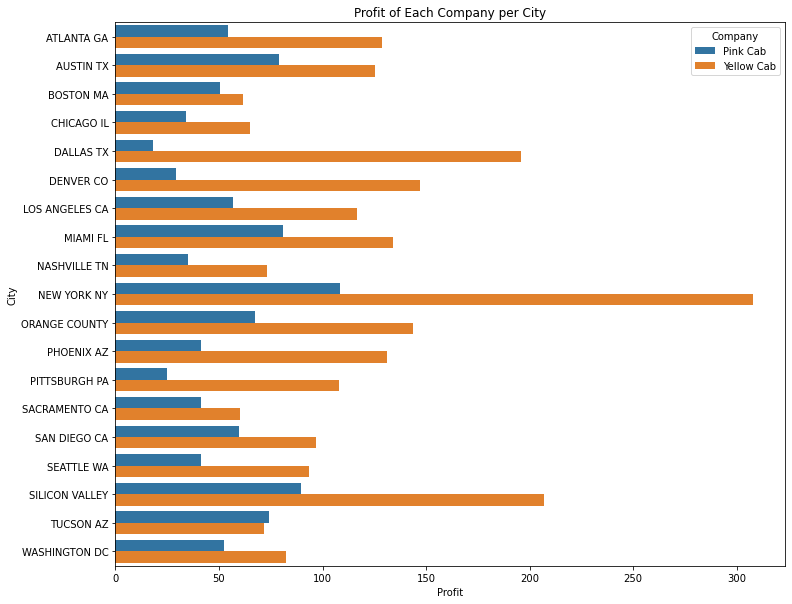

In [13]:
# Plot of profit in each city for both companies
plt.figure(figsize=(12, 10))
plt.title('Profit of Each Company per City')
sns.barplot(data= cab_data, y= 'City', x= 'Profit', ci= None, hue= 'Company', hue_order= ['Pink Cab', 'Yellow Cab'])


<AxesSubplot:title={'center':'Overall Profit per Company'}, xlabel='Company', ylabel='Profit'>

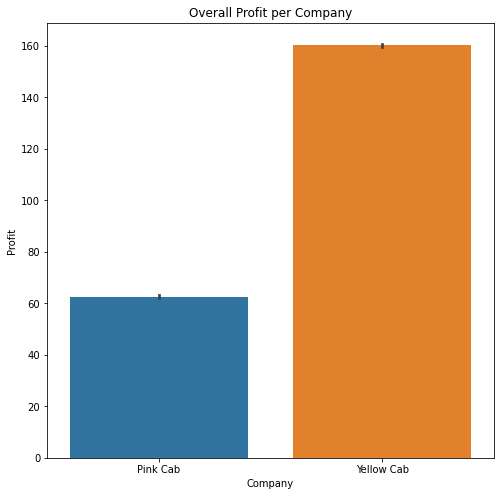

In [14]:
# Overall profit
plt.figure(figsize=(8, 8))
plt.title('Overall Profit per Company')
sns.barplot(data= cab_data, x= 'Company', y= 'Profit', order= ['Pink Cab', 'Yellow Cab'])

### Convert Date of Travel column to datetime format

In [15]:
# Import necessary packages
from datetime import datetime, timedelta

In [16]:
# Function for date conversion *explain further
def to_date_format(n):
    date_str= (datetime(1899, 12, 30)+ timedelta(n-1)).strftime("%d-%m-%Y")
    date_date= datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [17]:
# Apply function to dataframe
cab_data['Date of Travel']= cab_data['Date of Travel'].apply(lambda x:to_date_format(x))

In [18]:
# Sort out order of values
cab_data= cab_data.sort_values(by= ['Date of Travel'])
cab_data= cab_data.reset_index(drop= True)

print('rows=', cab_data.shape[0], ',  columns=', cab_data.shape[1])
cab_data

rows= 359392 ,  columns= 8


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,66.6760
1,10000640,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,164.9960
2,10000635,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,195.7548
3,10001001,2016-01-01,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,796.6140
4,10000171,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,122.0660
...,...,...,...,...,...,...,...,...
359387,10435011,2018-12-30,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,18.8980
359388,10433309,2018-12-30,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,8.1600
359389,10435915,2018-12-30,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,-2.8388
359390,10439845,2018-12-30,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,151.8488


In [19]:
# Create new columns for year and month
cab_data['Year']= cab_data['Date of Travel'].dt.year
cab_data['Month']= cab_data['Date of Travel'].dt.month_name()
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Year,Month
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,66.6760,2016,January
1,10000640,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,164.9960,2016,January
2,10000635,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,195.7548,2016,January
3,10001001,2016-01-01,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,796.6140,2016,January
4,10000171,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,122.0660,2016,January
...,...,...,...,...,...,...,...,...,...,...
359387,10435011,2018-12-30,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,18.8980,2018,December
359388,10433309,2018-12-30,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,8.1600,2018,December
359389,10435915,2018-12-30,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,-2.8388,2018,December
359390,10439845,2018-12-30,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,151.8488,2018,December


In [20]:
# Inspect dataframe after changes made
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Profit          359392 non-null  float64       
 8   Year            359392 non-null  int64         
 9   Month           359392 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 27.4+ MB


### Continue EDA

In [21]:
loop= [2016, 2017, 2018]
for i in range(3):
    yeah= cab_data[cab_data['Year']==loop[i]]
    count= yeah['Transaction ID'].value_counts().count()
    print(count)

108222
127964
123206


<AxesSubplot:title={'center':'Profit per Month per Year'}, xlabel='Month', ylabel='Profit'>

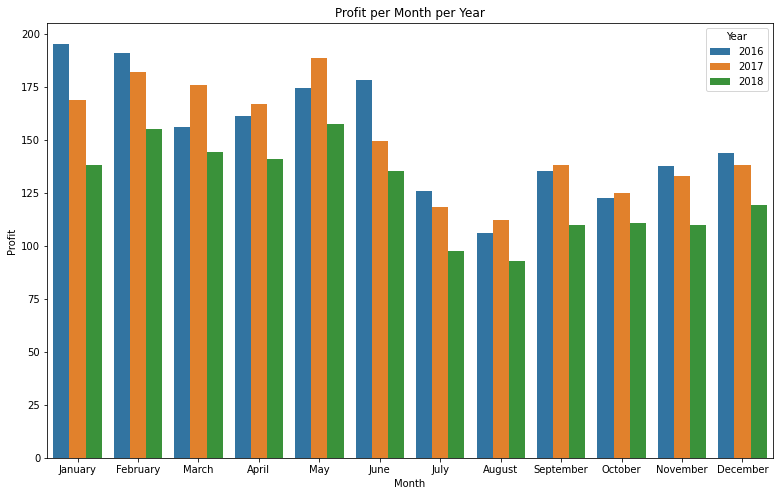

In [22]:
# Profit per company for each year
plt.figure(figsize=(13, 8))
plt.title('Profit per Month per Year')
sns.barplot(data= cab_data, x= 'Month', y= 'Profit', ci= None, hue= 'Year')


In [23]:
# Population of cities and number of cab users
popcity =pd.read_csv(r"C:\Users\kojoa\Desktop\Data Glacier\DataSets\City.csv")
popcity

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [24]:
# Concise summary of dataframe
popcity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [25]:
# Check for duplicates
popcity.duplicated().value_counts()

False    20
dtype: int64

In [26]:
# Change Population and Users datatype to int.
popcity['Population']= popcity.Population.str.replace(',', '').astype(int)
popcity['Users']= popcity.Users.str.replace(',', '').astype(int)
popcity


,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


<AxesSubplot:title={'center':'Proportion of Cab Users per City Populace'}, xlabel='City'>

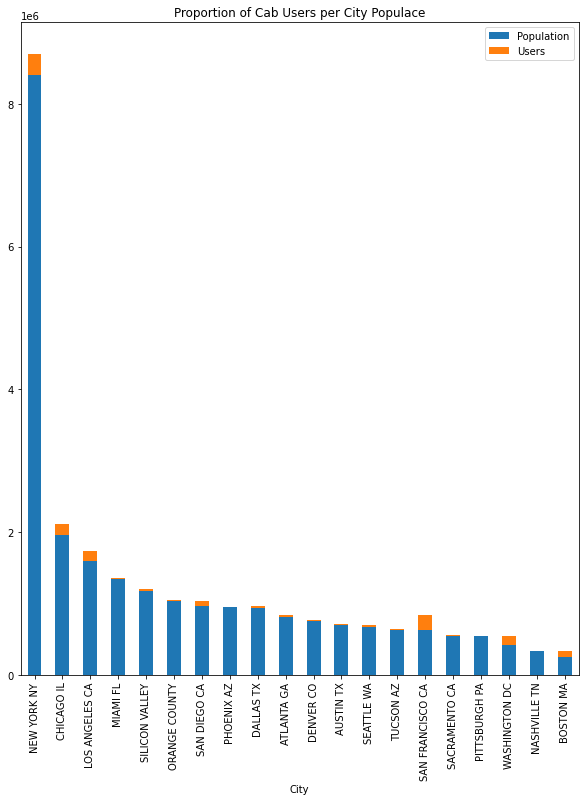

In [27]:
# Create stacked bar chart
popcity.plot(kind='bar', x= 'City', stacked=True, figsize=(10,12), title= "Proportion of Cab Users per City Populace")


In [28]:
# Counting cab users and entire population
counter= 0
smallcounter= 0
for i in range(20):
    counter+= popcity['Population'].loc[i]
    smallcounter+= popcity['Users'].loc[i]  
print(smallcounter)
print(counter)

1290413
24631840


In [29]:
# New column and value sorting
popcity['User percentage']= popcity['Users']/popcity['Population']* 100
popcity.sort_values(by=['Users'], ascending= False)

,City,Population,Users,User percentage
0,NEW YORK NY,8405837,302149,3.594514
14,SAN FRANCISCO CA,629591,213609,33.928217
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
17,WASHINGTON DC,418859,127001,30.320705
19,BOSTON MA,248968,80021,32.141078
6,SAN DIEGO CA,959307,69995,7.296413
4,SILICON VALLEY,1177609,27247,2.313756
12,SEATTLE WA,671238,25063,3.733847
9,ATLANTA GA,814885,24701,3.031225


In [30]:
# Verify cab activity in San Francisco
cab_data.loc[cab_data['City']=='SAN FRANCISCO'].count()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Profit            0
Year              0
Month             0
dtype: int64

In [31]:
# Map of customer to customer demographics (customers of the two cab companies)
demograph = pd.read_csv(r"C:\Users\kojoa\Desktop\Data Glacier\DataSets\Customer_ID.csv")
demograph

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [32]:
# Concise summary of dataframe
demograph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [33]:
# Check for duplicates
demograph.duplicated().value_counts()

False    49171
dtype: int64

In [34]:
# Check customer count
demograph['Customer ID'].nunique()

49171

<AxesSubplot:title={'center':'Distribution of Ages of Cab Users'}, xlabel='Age', ylabel='Count'>

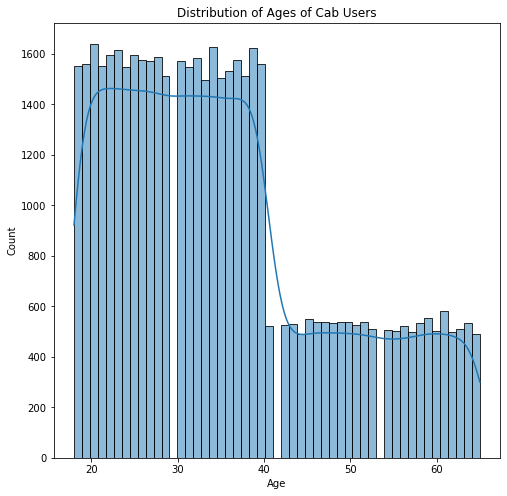

In [35]:
# Age and Income distribution of customers
plt.figure(figsize=(8,8))
plt.title('Distribution of Ages of Cab Users')
sns.histplot(data= demograph, x= 'Age', kde= True)    

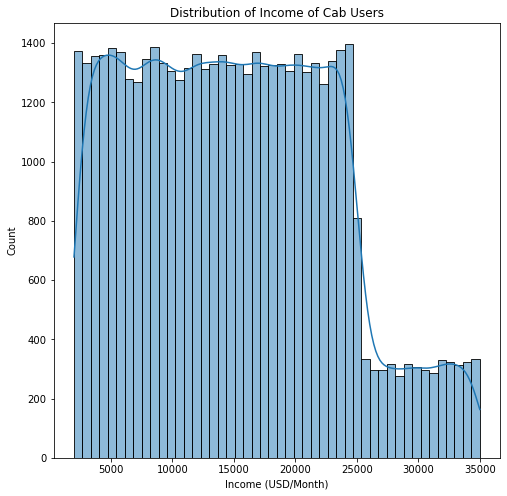

In [36]:
# Income distribution of customers
plt.figure(figsize=(8,8))
plt.title('Distribution of Income of Cab Users')
sns.histplot(data= demograph, x= 'Income (USD/Month)', kde= True)   

<AxesSubplot:title={'center':'Gender Representation of Cab Users'}, xlabel='Gender', ylabel='count'>

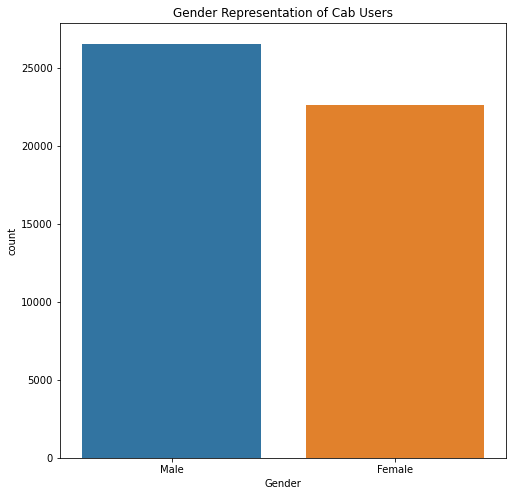

In [37]:
# Gender count
plt.figure(figsize=(8,8))
plt.title('Gender Representation of Cab Users')
sns.countplot(data= demograph, x= 'Gender')


In [38]:
# Transaction to customer mapping and payment mode
trans = pd.read_csv(r"C:\Users\kojoa\Desktop\Data Glacier\DataSets\Transaction_ID.csv")
trans

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [39]:
# Transactions per customer
trans['Customer ID'].nunique()
trans['Transaction ID'].nunique()
440098/49171

8.95035691769539

In [40]:
# Concise summary of dataframe
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [41]:
# Check for duplicates
trans.duplicated().value_counts()

False    440098
dtype: int64

<AxesSubplot:title={'center':'Representation of Payment Modes used for Cabs'}, xlabel='Payment_Mode', ylabel='count'>

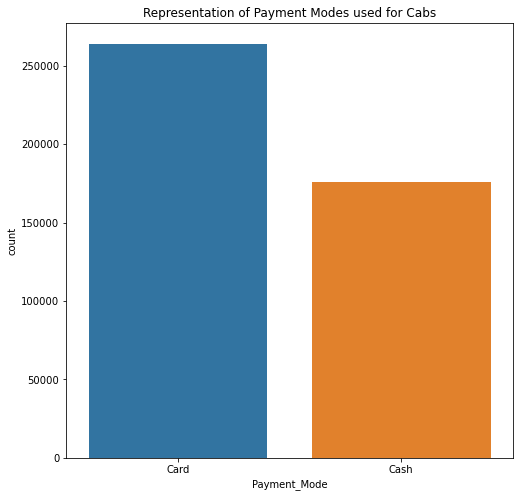

In [42]:
# Mode of payment count
plt.figure(figsize= (8,8))
plt.title('Representation of Payment Modes used for Cabs')
sns.countplot(data= trans, x= 'Payment_Mode')


### Create Master data

In [43]:
# Customer record
customer= trans.merge(demograph, how= 'inner', on= 'Customer ID')
customer

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237
...,...,...,...,...,...,...
440093,10439799,12490,Cash,Male,33,18713
440094,10439820,14971,Card,Male,30,15346
440095,10439838,41414,Card,Male,38,3960
440096,10439840,41677,Cash,Male,23,19454


In [44]:
# Customer using cab service
masterdata= customer.merge(cab_data, how= 'inner', on= 'Transaction ID')
masterdata

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Year,Month
0,10000011,29290,Card,Male,28,10813,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,2016,January
1,10351127,29290,Cash,Male,28,10813,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,2018,July
2,10412921,29290,Card,Male,28,10813,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,2018,November
3,10000012,27703,Card,Male,27,9237,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,2016,January
4,10320494,27703,Card,Male,27,9237,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,2018,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,Female,42,19417,2018-01-06,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656,2018,January
359388,10439799,12490,Cash,Male,33,18713,2018-01-02,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980,2018,January
359389,10439838,41414,Card,Male,38,3960,2018-01-03,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100,2018,January
359390,10439840,41677,Cash,Male,23,19454,2018-01-05,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600,2018,January


In [45]:
yellow=masterdata[masterdata['Company']=='Yellow Cab']

In [46]:
masterdata['Customer ID'].nunique()
yellow['Customer ID'].nunique()

39896

In [47]:
# Missing transactions
440098-359392

80706

# Report

The two cab companies are Pink Cab and Yellow Cab.

49,171 people use cabs, making 440,098 different cab rides. Time period for this data is not known.<br>
Cab users from 20 cities number 1,290,413 out of a total population of 24,631,840.<br>
San Francisco has the highest cab user percentage among the 20 cities.<br>
Bulk of cab users fall between the ages of 20 and 40.<br>
Income bracket of most cab users fall between 5000 and 25000 dollars.

Pink and Yellow Cab companies operate in 19 out of these 20 cities.San Francisco is the city they are currently not present in.<br>
They both travel averagely the same distances.<br>
Profits have been decreasing for both companies since 2016. 2018 had the lowest profit among all the years.<br>
Their total car rides tally at 359,392 for 3 years spanning 2016-2018 if we assume number of transactions to be equal to trips.<br>
It was also assumed that the number of cabs available equalled the number of transactions though this cannot be proved.<br>
46,148 people use either Yellow or Pink cabs.There are more Yellow cabs in 14 out of 19 cities.<br>
39,896 people use Yellow cab.<br>
Yellow cab's prices cost more than Pink cab's, but they make more profit in all cities except Tucson AZ.<br>


### EDA of Masterdata

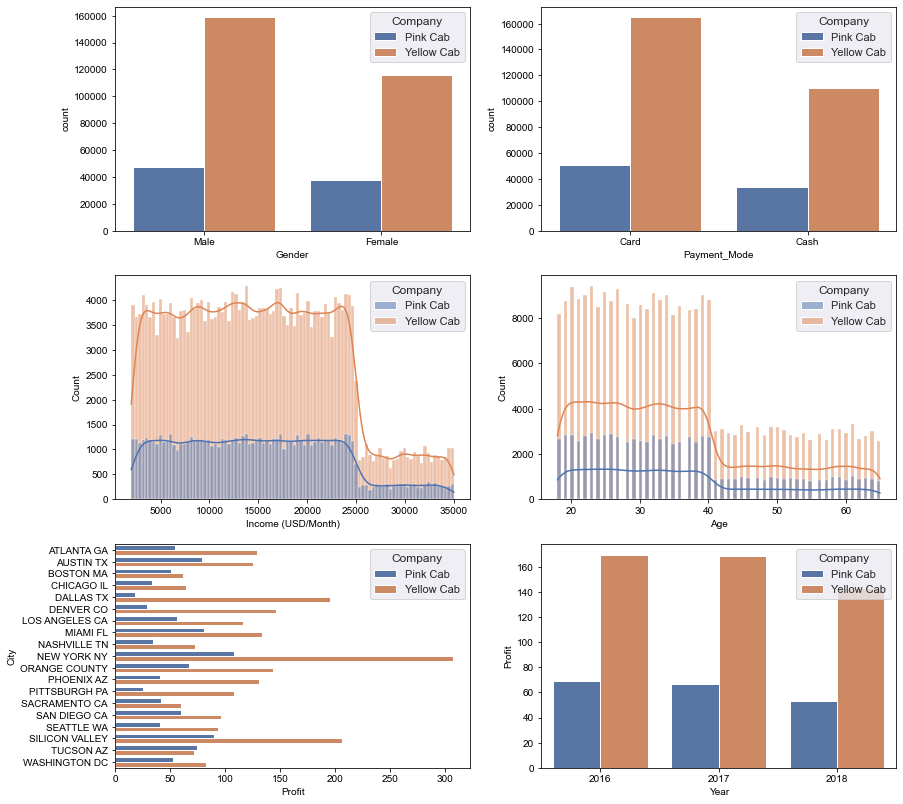

In [48]:
fig, axes= plt.subplots(3,2, figsize= (14,14))
sns.set()

sns.countplot(data= masterdata, x= 'Gender', hue= 'Company', ax=axes[0,0])
sns.countplot(data= masterdata, x= 'Payment_Mode', hue= 'Company', ax=axes[0,1])
sns.histplot(data= masterdata, x= 'Income (USD/Month)', kde= True, hue= 'Company', ax=axes[1,0])  
sns.histplot(data= masterdata, x= 'Age', kde= True, hue= 'Company', ax=axes[1,1])  
sns.barplot(data= masterdata, x= 'Year', y= 'Profit', ci= None, hue= 'Company', ax=axes[2,1])
#sns.barplot(data= masterdata, x= 'Payment_Mode', y= 'Profit', ci= None, hue= 'Company', ax=axes[2,1])
sns.barplot(data= masterdata, y= 'City', x= 'Profit', ci= None, hue= 'Company', ax=axes[2,0])

plt.show()

Areas to investigate<br>
1. Which company has maximum cab users at a particular time period?
2. Does profit proportionally increase with increase in number of customers?
3. What are the attributes of these customer segments?

### Customer Share

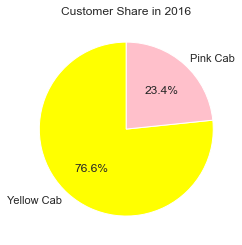

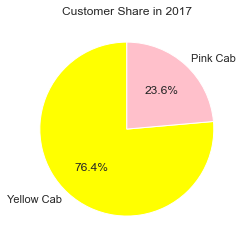

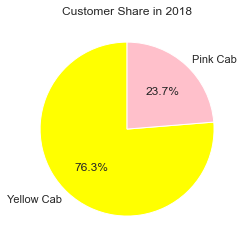

In [49]:
loop= [2016, 2017, 2018]
for i in range(3):
    share= [masterdata[(masterdata.Year==loop[i]) & (masterdata.Company=='Yellow Cab')]['Customer ID'].count(),masterdata[(masterdata.Year==loop[i]) & (masterdata.Company=='Pink Cab')]['Customer ID'].count() ]
    plt.pie(share, labels= ['Yellow Cab', 'Pink Cab'], colors= ['Yellow', 'Pink'], startangle= 90, autopct= '%1.1f%%')
    plt.title('Customer Share in '+ str(loop[i]))
    plt.show()


### Profit with customer

<AxesSubplot:title={'center':'Profit Distribution Count'}, xlabel='Profit', ylabel='Count'>

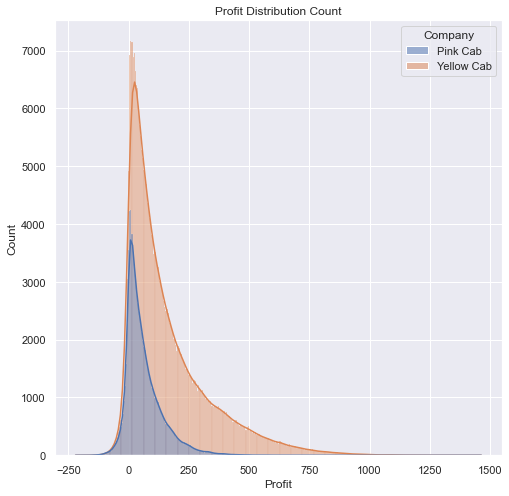

In [50]:
plt.figure(figsize=(8,8))
plt.title('Profit Distribution Count')
sns.histplot(data= masterdata, x= 'Profit', kde= True, hue= 'Company')  


### Age group segments

In [51]:
# Customer segments by age groups
# Below 20, 20-45,Above 45
young= masterdata[masterdata['Age']<20]
old= masterdata[masterdata['Age']>45]
mid= masterdata[masterdata['Age'].between(20,45)]


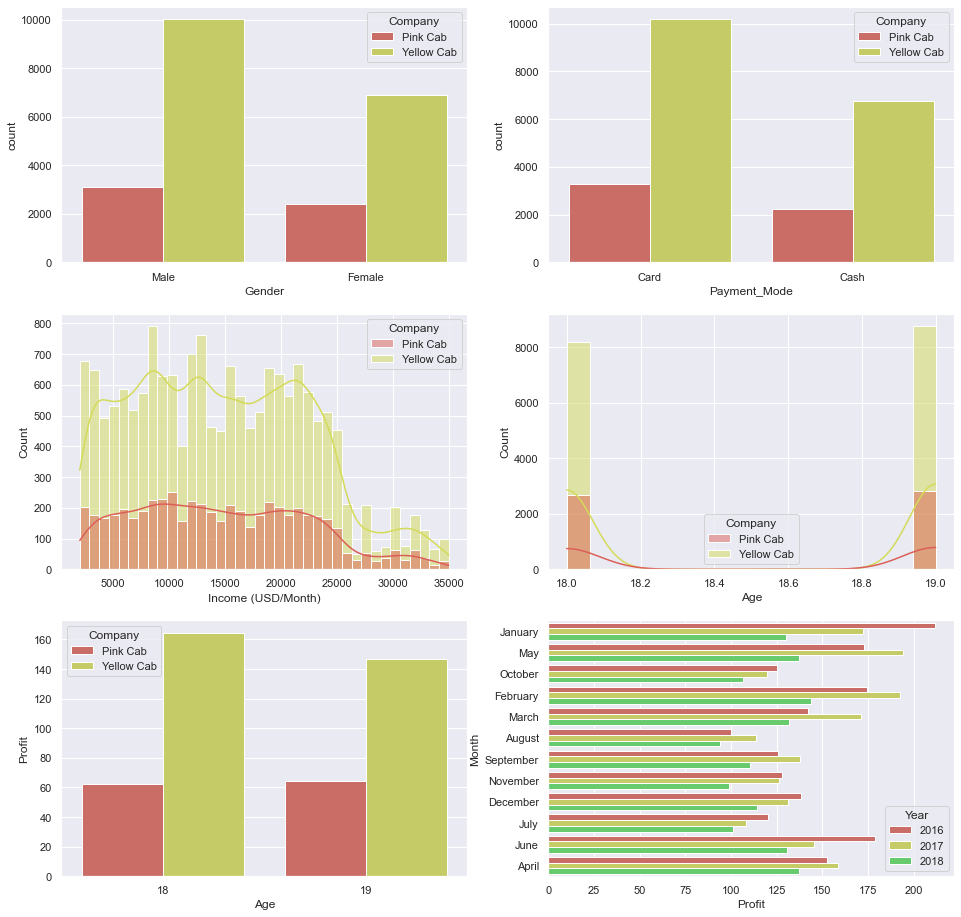

In [52]:
fig, axes= plt.subplots(3,2, figsize= (16,16))
sns.set_palette(palette='hls')

sns.countplot(data= young, x= 'Gender', hue= 'Company', ax=axes[0,0])
sns.countplot(data= young, x= 'Payment_Mode', hue= 'Company', ax=axes[0,1])
sns.histplot(data= young, x= 'Income (USD/Month)', kde= True, hue= 'Company', ax=axes[1,0])  
sns.histplot(data= young, x= 'Age', kde= True, hue= 'Company', ax=axes[1,1])  
sns.barplot(data= young, x= 'Age', y= 'Profit', ci= None, hue= 'Company', ax=axes[2,0])
sns.barplot(data= young, y= 'Month', x= 'Profit', ci= None, hue= 'Year', ax=axes[2,1], orient='h')

plt.show()


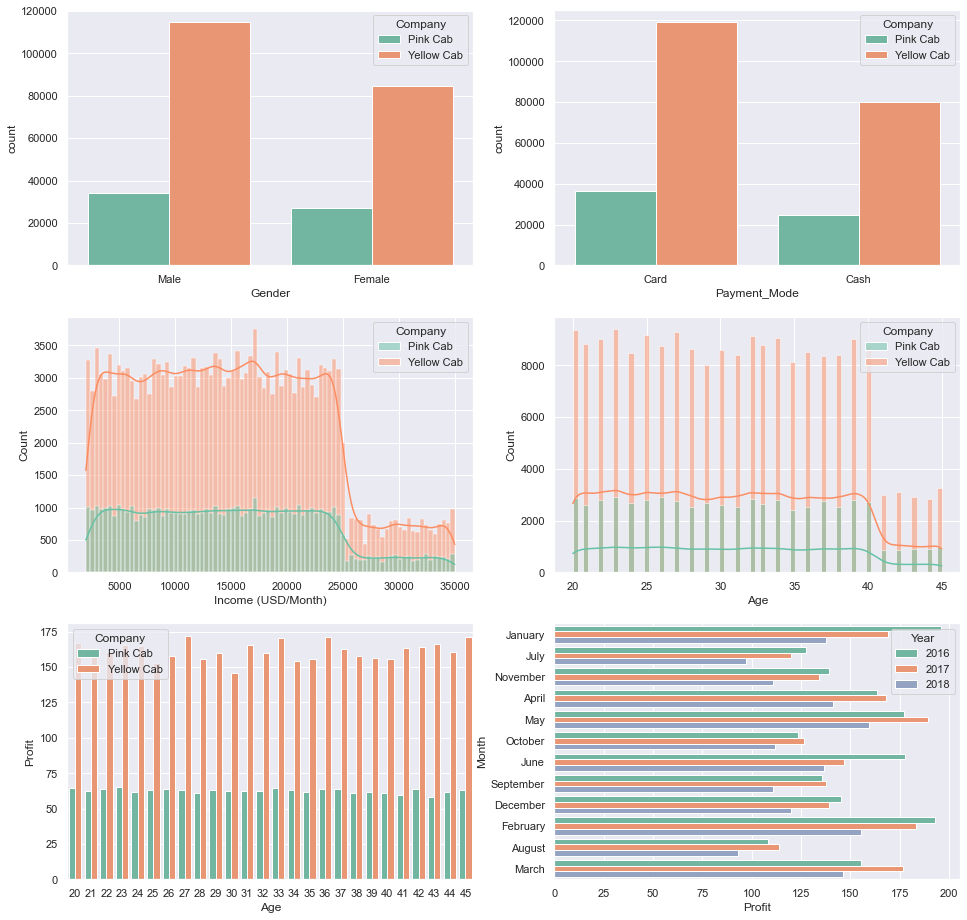

In [53]:
fig, axes= plt.subplots(3,2, figsize= (16,16))
sns.set_palette('Set2')

sns.countplot(data= mid, x= 'Gender', hue= 'Company', ax=axes[0,0])
sns.countplot(data= mid, x= 'Payment_Mode', hue= 'Company', ax=axes[0,1])
sns.histplot(data= mid, x= 'Income (USD/Month)', kde= True, hue= 'Company', ax=axes[1,0])  
sns.histplot(data= mid, x= 'Age', kde= True, hue= 'Company', ax=axes[1,1])  
sns.barplot(data= mid, x= 'Age', y= 'Profit', ci= None, hue= 'Company', ax=axes[2,0])
sns.barplot(data= mid, y= 'Month', x= 'Profit', ci= None, hue= 'Year', ax=axes[2,1], orient='h')

plt.show()


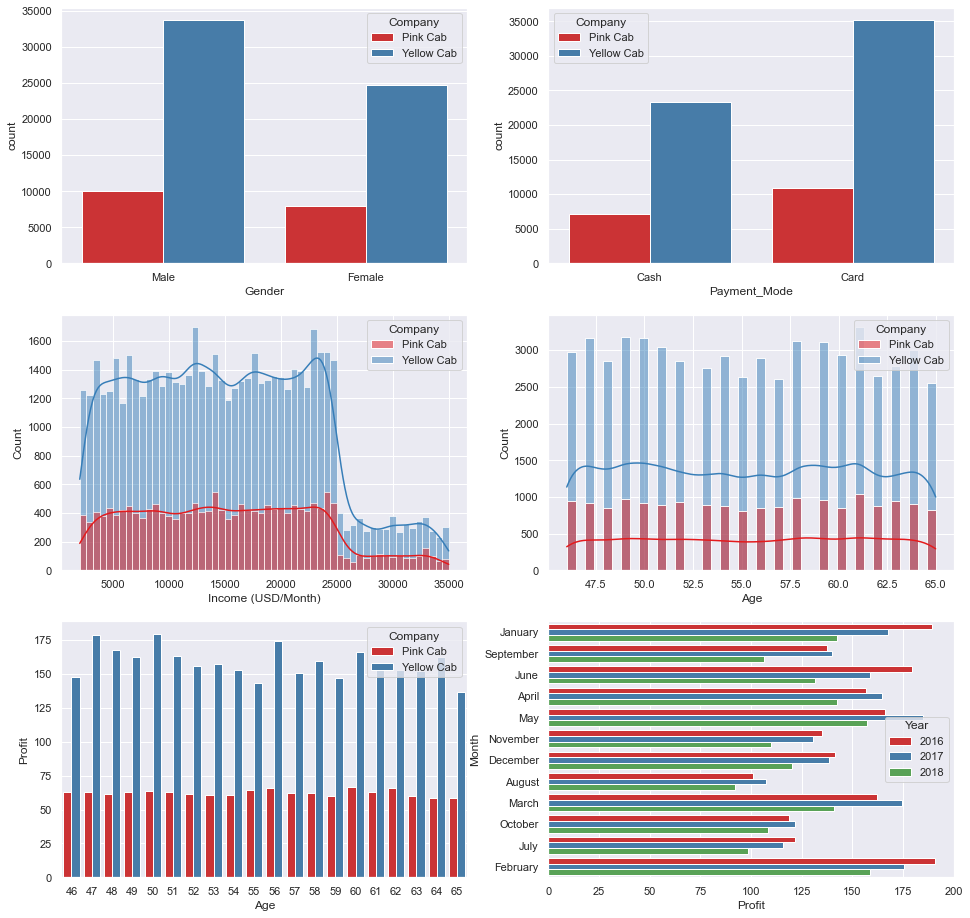

In [54]:
fig, axes= plt.subplots(3,2, figsize= (16,16))
sns.set_palette('Set1')

sns.countplot(data= old, x= 'Gender', hue= 'Company', ax=axes[0,0])
sns.countplot(data= old, x= 'Payment_Mode', hue= 'Company', ax=axes[0,1])
sns.histplot(data= old, x= 'Income (USD/Month)', kde= True, hue= 'Company', ax=axes[1,0])  
sns.histplot(data= old, x= 'Age', kde= True, hue= 'Company', ax=axes[1,1])  
sns.barplot(data= old, x= 'Age', y= 'Profit', ci= None, hue= 'Company', ax=axes[2,0])
sns.barplot(data= old, y= 'Month', x= 'Profit', ci= None, hue= 'Year', ax=axes[2,1], orient='h')

plt.show()

## Hypotheses

1. Do Yellow and/or Pink cabs have lower profit from females?<br>
2. Is that difference due to difference in km travelled?<br>
3. Is there a difference in profit for card and cash payers?<br>
4. Do Yellow cabs give discounts to people older than 45?<br>
5. Were there promotional offers for young people in 2017 compared to 2016?<br>

In [55]:
import scipy
from scipy import stats

In [56]:
a = masterdata[(masterdata.Gender=='Female')&(masterdata.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = masterdata[(masterdata.Gender=='Male')&(masterdata.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that Yellow cabs could have lower profit from females')
else:
    print('We accept null hypothesis that Yellow cabs do not have lower profit from females')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that Yellow cabs could have lower profit from females
P value is  6.060473042494144e-25


In [57]:
a = masterdata[(masterdata.Gender=='Female')&(masterdata.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = masterdata[(masterdata.Gender=='Male')&(masterdata.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that Pink cabs could have lower profit from females')
else:
    print('We accept null hypothesis that Pink cabs do not have lower profit from females')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that Pink cabs do not have lower profit from females
P value is  0.11515305900425798


In [58]:
a = masterdata[(masterdata.Gender=='Female')&(masterdata.Company=='Yellow Cab')].groupby('Transaction ID')['KM Travelled'].mean()
b = masterdata[(masterdata.Gender=='Male')&(masterdata.Company=='Yellow Cab')].groupby('Transaction ID')['KM Travelled'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that Yellow cabs could have lower profit from females because of KM travelled')
else:
    print('We accept null hypothesis that Yellow cabs do not have lower profit from females because of KM travelled')
    
print('P value is ', p_value)

116000 158681
We accept null hypothesis that Yellow cabs do not have lower profit from females because of KM travelled
P value is  0.5146654429411317


Then it can be assumed that Yellow cabs offer females some discount on fares.

In [59]:
a = masterdata[(masterdata.Payment_Mode=='Card')&(masterdata.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = masterdata[(masterdata.Payment_Mode=='Cash')&(masterdata.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that Yellow cabs could have difference in profit by payment modes')
else:
    print('We accept null hypothesis that for Yellow cabs there is no difference in profit by payment modes')
    
print('P value is ', p_value)

164785 109896
We accept null hypothesis that for Yellow cabs there is no difference in profit by payment modes
P value is  0.29330606382985325


In [60]:
a = masterdata[(masterdata.Payment_Mode=='Card')&(masterdata.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = masterdata[(masterdata.Payment_Mode=='Cash')&(masterdata.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis Pink cabs could have difference in profit by payment modes')
else:
    print('We accept null hypothesis that for Pink cabs there is no difference in profit by payment modes')
    
print('P value is ', p_value)

50719 33992
We accept null hypothesis that for Pink cabs there is no difference in profit by payment modes
P value is  0.7900465828793288


In [61]:
a = old[old['Company']=='Yellow Cab'].groupby('Transaction ID').Profit.mean()
b = old[old['Company']=='Pink Cab'].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that Yellow cabs could have lower profit from old category')
else:
    print('We accept null hypothesis that Yellow cabs do not have lower profit from old category')
    
print('P value is ', p_value)

58553 18083
We accept alternate hypothesis that Yellow cabs could have lower profit from old category
P value is  0.0


In [62]:
a = old[old['Company']=='Yellow Cab'].groupby('Transaction ID')['KM Travelled'].mean()
b = old[old['Company']=='Pink Cab'].groupby('Transaction ID')['KM Travelled'].mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that Yellow cabs could have have lower profit from old category due to KM travelled')
else:
    print('We accept null hypothesis that Yellow cabs do not have lower profit from old category due to KM travelled')
    
print('P value is ', p_value)
print('Lower profits could be due to special discount offers')

58553 18083
We accept null hypothesis that Yellow cabs do not have lower profit from old category due to KM travelled
P value is  0.26657418210290884
Lower profits could be due to special discount offers


Then it can be assumed that Yellow cabs offer older people some discount on fares.

In [63]:
a = young[young['Year']==2017].groupby('Transaction ID').Profit.mean()
b = young[young['Year']==2016].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that promotions could have been given to young adults')
else:
    print('We accept null hypothesis that no promotions were given to young adults')
    
print('P value is ', p_value)

8159 6673
We accept null hypothesis that no promotions were given to young adults
P value is  0.9135638002748829


In [64]:
a = mid[mid['Year']==2017].groupby('Transaction ID').Profit.mean()
b = mid[mid['Year']==2016].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that promotions could have been given to teenagers')
else:
    print('We accept null hypothesis that no promotions were given to teenagers')
    
print('P value is ', p_value)

92464 78454
We accept alternate hypothesis that promotions could have been given to teenagers
P value is  0.007840965445715487


There is not enough to suggest that promotional offers were given to young people in 2017.

## Conclusion

I have evaluated both the cab companies on following points and found Yellow cab better than Pink cab:

1. Profit Analysis

Profits: Higher Profits over the time and less fluctuations monthly.

Profits over Rides: Yellow Cab has more Profits per Ride.

Profits Citywise: Yellow Cab has greater market share in every City.

Profitable Rides: Yellow Cab has a high performance among every city. In contrast, Pink Cab does not perform well in many cities.

2. Demand Analysis

Demand: Yellow Cab has more than triple the demand of Pink Cab Company

Demand Agewise: Both companies present the same distribution of Demand Agewise

3. Client Analysis

Payment Mode Distributions: Both companies present the same distribution of Payment Mode over time, citywise and agewise.

On the basis of above point , I will recommend Yellow cab for investment.